<a href="https://colab.research.google.com/github/tbeucler/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/S2_3_Statistical_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will be used in the lab session for week 2 of the course and provides some hands-on experience applying the lessons to environmental science datasets.

Need a reminder of last week's labs? Click [_here_](https://github.com/tbeucler/2022_ML_Earth_Env_Sci/blob/main/Lab_Notebooks/Week_1_Basics_of_Python.ipynb) to go to notebook for week 1 of the course.

#Statistical Forecasting - Wilks

We will be using data from Wilks' book on Statistical Methods for the Atmospheric Sciences

## Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import pooch

#Data Visalization Import
from google.colab import data_table


# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Let's begin by loading relevant data from the cloud. 

In [ ]:
#Loading Wilks' Table A-3 from the course datastore
csv_path = 'https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EXG7Rht55mhPiwkUKEDSI8oBuXNe8OOLYJX3_5ACmK1w5A?download=1'
hash = 'c158828a1bdf1aa521c61321842352cb1674e49187e21c504188ab976d3a41f2'
csv_file = pooch.retrieve(csv_path, known_hash=hash)

A3_df = pd.read_csv(csv_file, index_col=0)

#Display an interactive datatable for data visualization
data_table.DataTable(A3_df, num_rows_per_page=10)

##**Linear Regression**

The goal for this exercise is to train a linear regression model and a logistic regression model to forecast atmospheric temperature using atmospheric pressure. 🌡 

For the first case, we want to train linear regression to calculate June temperatures (the predictand) from June pressures (as the predictor) in Guayaquil, Ecuador.



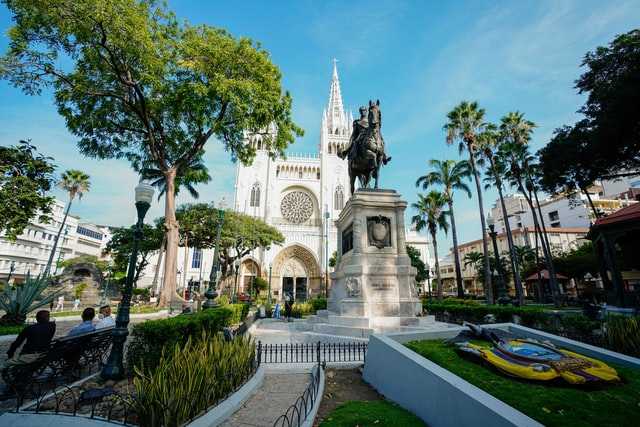

**Caption** A beautiful day in Guayacil, Ecuador. Can you predict how hot it will be? 🌞

We can try addressing this question using a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from scikit. 

**Q1) Import the LinearRegression model. Instantiate it and fit it using the A3 dataframes' pressure and temperature.**

Complete the code below

In [ ]:
# Import the LinearRegression model
from __.__ import LinearRegression

In [ ]:
# Instantiate the model
lin_reg = LinearRegression()

In [ ]:
# Load and reshape the input data
pressure = A3_df[''].values.reshape(-1,1)

In [ ]:
# Load the truth data (i.e., the predictant)
temperature = 

In [ ]:
# Fit the model
lin_reg.fit(_____, ____)

We now have a linear regression model for the temperature and pressure. Let's make some plots to visualize our data and get a qualitative sense of our model.

**Q2) Generate a scatter plot with the linear regression plot for our data.**

In [ ]:
#Complete the code below

#Instantiate a figure having size 13,6
fig, ax = plt.subplots()

# Set figure title and axis labels
fig.suptitle('June Temperature vs Pressure  in Guayaquil, Ecuador')
ax.set_xlabel("Pressure (mb)")
ax.set_ylabel("Temperature (°C)")

# The colors and styles suggested below are not compulsory, but please avoid 
# using the default settings.

# Make a scatter plot for the pressure (x) and temperature (y). Use color=black,
# marker size = 100, and set the marker style to '2'.
ax.scatter()

# Make a 100 point numpy array between 1008 and 1014 and store it in reg_x. 
# Reshape it to (-1,1). Hint: numpy has a linear space generator
reg_x = 

# Let's produce a set of predictions from our linear space array.
reg_y = lin_reg.predict(reg_x)

# Let's plot the regression line using reg_x and reg_y. Set the color to red and
# the linewidth to 1.5
ax.plot()
ax.autoscale(axis='x', tight=True)

We now have a qualitative verification of our model - but this is not enough. Let's do some quantitative analyses:

**Q3) Print the slope of our model. Find the F-score, p-value, and $R^2$ statistics for our model.**

In [ ]:
# Complete the code below

# Fetch the slope directly from the linear model. Hint: check the attributes 
# section of the linear regression model documentation on scikit.
slope = 

# Calculate the F-score and p-value for our dataset.
# Hint: check the f_regression option in sklearn.feature_selection
fscore, pvalue = 

# Fetch the R2 value from the lin_reg model. Hint: check built-in score methods
R_squared = 


##**Classification**

Let's use the same dataset to train a classifier for El Niño years. We will use the June temperature and pressure in Guayaquil as the predictors for El Niño. Let's begin by setting up a training and testing dataset. Since the dataset is so small, we'll set aside one each of a random El Niño year and a non-El Niño year for our test dataset, and the remaining points as our training dataset.

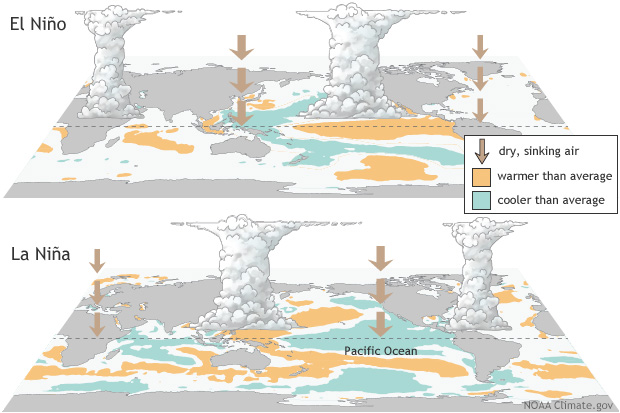

**Source:** [NOAA "What is Enso?"](https://www.climate.gov/enso)

**Caption:** Can we predict whether we are in an El Niño phase based on June temperatures and pressures in Guayaquil, Ecuador?

In [ ]:
# Let's make our train and test datasets
def test_train_split(df, rnd_gen):
    nino_years = df.loc[df['El Niño']==1].index.values
    not_nino_years = df.loc[df['El Niño']==0].index.values

    nino_idxs = rnd_gen.permutation(np.arange(0,nino_years.size))
    not_nino_idxs = rnd_gen.permutation(np.arange(0,not_nino_years.size))

    train = ( list(nino_years[nino_idxs[:-1]]) +
              list(not_nino_years[not_nino_idxs[:-1]]) )
  
    test = [nino_years[nino_idxs[-1]], not_nino_years[not_nino_idxs[-1]]]
    
    return (np.array(test), np.array(train))

# Use test_train_split to make the testing and training datasets
test, train = test_train_split(A3_df, rnd_gen)
print(test, train)

We're going to train a logistic regression classifier on the dataset, but in this exercise we'll rely on the scikit learn implementation!

**Q4) Import and instantiate the logistic regression classifier from scikit. Fit it using the training dataset.**

Hint 1: Scikit-learn's `LogisticRegression` classifier is documented [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Hint 2: Before training, use the dataframes' [`.loc` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) with the test/train list, then convert the values to numpy (e.g., using [this method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)) and [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) the truth if necessary.

In [ ]:
# Build the training and test sets, using Hint 2 if necessary

In [ ]:
# Fit the logistic regression to the training set

That should hopefully have felt much simpler than our previous exercise. Now that you have a trained model, let's see if our model is able to predict whether the test years are El Niño years!

**Q5) Predict whether each of the two test years was an El Niño year using the logistic regression model, and print out the prediction alongside the truth.**

Hint: To find which method of your `LogisticRegression` classifier to use to make predictions, don't hesitate to consult its documentation [at this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
# Write your code here